# ENEXIS Graduation Project

## CRISP-DM Phase 3: Data Preparation

#### Enexis decentrale opwek data are combined with CBS Zonenstrom dataset. The resulting dataset contains PV installed capacity in years 2016 - 2022. It is then combined with CBS Kerncijfers dataset of 2019, and saved as "PV installed capacity.csv". 

#### Contents

* [Reading of CBS Zonenstrom final dataset](#readcbszon)
* [Reading of Enexis decentrale opwek final dataset](#readenexisdec)
* [Merging CBS Zonenstrom with Enexis decentrale opwek datasets](#mergepv)
* [Reading of CBS Kerncijfers dataset](#readcbs)
* [Merging PV installed capacity with CBS Kerncijfers dataset](#merge)
* [Data cleaning](#clean)

In [4]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata
pd.options.mode.chained_assignment = None  # default='warn'

<a id='readcbszon'></a>
#### Reading of CBS Zonenstrom final dataset

In [5]:
c_path = "../../Data/"
v_file = "CBS Zonnenstrom final" 

In [6]:
df     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/CBS Zonnenstrom final.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46192 entries, 0 to 46191
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                46192 non-null  object 
 1   BU_2021                             46192 non-null  object 
 2   BU_NAAM                             46192 non-null  object 
 3   WK_2021                             46192 non-null  object 
 4   WK_NAAM                             46192 non-null  object 
 5   GM_2021                             46192 non-null  object 
 6   GM_NAAM                             46192 non-null  object 
 7   ProvinciecodePV                     46192 non-null  object 
 8   Provincienaam                       46192 non-null  object 
 9   AantalInstallatiesBijWoningen_5     46192 non-null  float64
 10  OpgesteldVermogenVanZonnepanelen_6  46192 non-null  float64
dtypes: float64(2), object(9)
memory usage: 3.

<a id='readenexisdec'></a>
#### Reading of Enexis decentrale opwek final dataset

In [ ]:
v_file = "Enexis decentrale opwek final" 

In [ ]:
df1     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16863 entries, 0 to 16862
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       16863 non-null  object 
 1   BU_2021                                    16863 non-null  object 
 2   BU_NAAM                                    16863 non-null  object 
 3   WK_2021                                    16863 non-null  object 
 4   WK_NAAM                                    16863 non-null  object 
 5   GM_2021                                    16863 non-null  object 
 6   GM_NAAM                                    16863 non-null  object 
 7   ProvinciecodePV                            16863 non-null  object 
 8   Provincienaam                              16863 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  16863 non-null  float64
 10  Opgesteld vermogen    

<a id='mergepv'></a>
#### Merging CBS Zonenstrom with Enexis decentrale opwek datasets

In [ ]:
BU_list = df1['BU_2021'].tolist() # list of Buurts which are in Enexis remit

In [ ]:
df = df[df['BU_2021'].isin(BU_list)] # only buurts which are in Enexis remit

In [ ]:
df.columns = df1.columns # make sure column names are the same

In [ ]:
df = pd.concat([df, df1], ignore_index=True)

In [ ]:
df.shape

(32020, 11)

In [ ]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,Opgesteld vermogen
0,2019-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,1426.0
1,2018-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,1068.0
2,2017-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,726.0
3,2016-01-01,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,504.0
4,2019-01-01,BU16800009,Verspreide huizen Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,12.0,50.0


Lets define an auxiliary variable, 'OV_per_installatie', i.e. average capacity per installation

In [ ]:
df['Provincienaam'].value_counts()

Noord-Brabant    11555
Overijssel        6975
Limburg           6645
Drenthe           4307
Groningen         2538
Name: Provincienaam, dtype: int64

In [ ]:
df['GM_NAAM'].value_counts().nlargest(5)

Groningen    833
Venlo        781
Oss          751
Tilburg      737
Assen        725
Name: GM_NAAM, dtype: int64

In [ ]:
df['Year'].value_counts()

2019-01-01    4271
2022-01-01    4204
2018-01-01    3913
2017-01-01    3681
2020-01-01    3306
2016-01-01    3292
2021-07-01    3167
2021-01-01    3121
2020-07-01    3065
Name: Year, dtype: int64

In [ ]:
type(df['Year'][0]) # year is of string type. Consider changing it to datetime

str

<a id='readcbs'></a>
#### Reading of CBS Kerncijfers dataset

In [ ]:
v_file = "CBS_Kerncijfers2019_intermediate_dataset"

In [ ]:
df1     = pd.read_csv(filepath_or_buffer = c_path + v_file + ".csv",
                      encoding           = 'UTF-8')

In [ ]:
df1.head(5).transpose()

,0,1,2,3,4
WijkenEnBuurten,Annen,Verspreide huizen Annen,Eext,Verspreide huizen Eext,Anloo
Gemeentenaam_1,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
SoortRegio_2,Buurt,Buurt,Buurt,Buurt,Buurt
Codering_3,BU16800000,BU16800009,BU16800100,BU16800109,BU16800200
MeestVoorkomendePostcode_113,9468,9468,9463,9463,9467
HuishoudensTotaal_28,1490,65,535,90,145
GemiddeldeHuishoudensgrootte_32,2.3,2.3,2.3,1.9,2.2
Bevolkingsdichtheid_33,1367.0,12.0,730.0,11.0,578.0
Woningvoorraad_34,1552,63,534,50,145
GemiddeldeWoningwaarde_35,241.0,426.0,241.0,353.0,292.0


In [ ]:
df1 = df1.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

<a id='merge'></a>
#### Merging PV installed capacity with CBS Kerncijfers dataset

In [ ]:
df = df.merge(df1, left_on = 'BU_2021', right_on = 'Codering_3', how = 'inner')

<a id='descr'></a>
#### Data description

Removing unnecessary columns

In [ ]:
df = df.drop(columns = ['Codering_3', 'Gemeentenaam_1', 'SoortRegio_2', 'WijkenEnBuurten'], axis =1)

Defining auxiliary features

In [ ]:
df['OV_per_installatie'] = df['Opgesteld vermogen'] / df['Aantal aansluitingen met opwekinstallatie'] 

In [ ]:
df['Opgesteld_vermogen_per100houshoudens'] = 100 * df['Opgesteld vermogen'] / df['HuishoudensTotaal_28']

In [ ]:
df['PVinstallaties_per100houshoudens'] = 100 * df['Aantal aansluitingen met opwekinstallatie'] / df['HuishoudensTotaal_28']

In [ ]:
df.head().transpose()

,0,1,2,3,4
Year,2019-01-01,2018-01-01,2017-01-01,2016-01-01,2020-01-01
BU_2021,BU16800000,BU16800000,BU16800000,BU16800000,BU16800000
BU_NAAM,Annen,Annen,Annen,Annen,Annen
WK_2021,WK168000,WK168000,WK168000,WK168000,WK168000
WK_NAAM,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen,Wijk 00 Annen
GM_2021,GM1680,GM1680,GM1680,GM1680,GM1680
GM_NAAM,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze
ProvinciecodePV,PV22,PV22,PV22,PV22,PV22
Provincienaam,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe
Aantal aansluitingen met opwekinstallatie,396.0,308.0,191.0,128.0,392.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18520 entries, 0 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       18520 non-null  object 
 1   BU_2021                                    18520 non-null  object 
 2   BU_NAAM                                    18520 non-null  object 
 3   WK_2021                                    18520 non-null  object 
 4   WK_NAAM                                    18520 non-null  object 
 5   GM_2021                                    18520 non-null  object 
 6   GM_NAAM                                    18520 non-null  object 
 7   ProvinciecodePV                            18520 non-null  object 
 8   Provincienaam                              18520 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  18520 non-null  float64
 10  Opgesteld vermogen    

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,18520,9,2019-01-01,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_2021,18520,2096,BU16900809,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_NAAM,18520,2050,Centrum,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WK_2021,18520,716,WK085601,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WK_NAAM,18520,711,Wijk 00 Haaksbergen (dorp),135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM_2021,18520,103,GM0983,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM_NAAM,18520,103,Venlo,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProvinciecodePV,18520,5,PV30,5470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provincienaam,18520,5,Noord-Brabant,5470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aantal aansluitingen met opwekinstallatie,18520.0,NaN,NaN,NaN,111.747192,144.55832,0.0,23.0,60.0,143.0,1656.0


In [ ]:
df.isna().sum()

Year                                            0
BU_2021                                         0
BU_NAAM                                         0
WK_2021                                         0
WK_NAAM                                         0
GM_2021                                         0
GM_NAAM                                         0
ProvinciecodePV                                 0
Provincienaam                                   0
Aantal aansluitingen met opwekinstallatie       0
Opgesteld vermogen                              0
MeestVoorkomendePostcode_113                    0
HuishoudensTotaal_28                            0
GemiddeldeHuishoudensgrootte_32                 0
Bevolkingsdichtheid_33                          0
Woningvoorraad_34                               0
GemiddeldeWoningwaarde_35                    1775
PercentageEengezinswoning_36                    8
Koopwoningen_40                                 8
InBezitWoningcorporatie_42                      8


Strange thing is, that there are no gaps in "Aantal aansluitingen met opwekinstallatie" nor "Opgesteld vermogen", but there are nan's in "OV_per_installatie". Possible explanation could be presence of 0 values among "Aantal ansluitingen". To be investigated.

In [ ]:
df[df['OV_per_installatie'].isna()].head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,GemiddeldInkomenPerInwoner_72,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,OV_per_installatie,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
55,2018-01-01,BU16800400,Anderen,WK168004,Wijk 04 Anderen,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,NaN,0.888889,30.2,0.333333,1.8,4.2,5.0,NaN,0.0,0.0
56,2017-01-01,BU16800400,Anderen,WK168004,Wijk 04 Anderen,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,NaN,0.888889,30.2,0.333333,1.8,4.2,5.0,NaN,0.0,0.0
57,2016-01-01,BU16800400,Anderen,WK168004,Wijk 04 Anderen,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,NaN,0.888889,30.2,0.333333,1.8,4.2,5.0,NaN,0.0,0.0
65,2017-01-01,BU16800500,Schipborg,WK168005,Wijk 05 Schipborg,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,2.439024,0.934579,32.7,0.215686,1.5,1.0,5.0,NaN,0.0,0.0
66,2016-01-01,BU16800500,Schipborg,WK168005,Wijk 05 Schipborg,GM1680,Aa en Hunze,PV22,Drenthe,0.0,...,2.439024,0.934579,32.7,0.215686,1.5,1.0,5.0,NaN,0.0,0.0


In [ ]:
df[df['OV_per_installatie'].isna()]['Aantal aansluitingen met opwekinstallatie'].value_counts()

0.0    649
Name: Aantal aansluitingen met opwekinstallatie, dtype: int64

Indeed, all of the nan's result from 0 values if "Aantal aanslutingen.." column. We can therefore replace these nan's with 0.

In [ ]:
df['OV_per_installatie'] = df['OV_per_installatie'].fillna(0)

<AxesSubplot:>

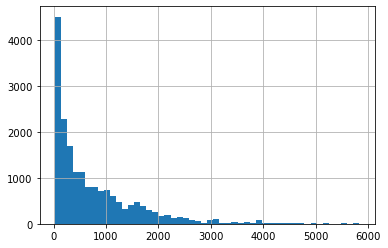

In [ ]:
df['HuishoudensTotaal_28'].hist(bins  = 50)

In [ ]:
df_lessthan50 = df[df['HuishoudensTotaal_28']<50]
df_lessthan50.T

,90,91,92,93,94,95,96,97,98,225,...,17950,18323,18324,18325,18326,18327,18328,18329,18330,18331
Year,2019-01-01,2018-01-01,2017-01-01,2016-01-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2022-01-01,2019-01-01,...,2020-01-01,2019-01-01,2018-01-01,2017-01-01,2016-01-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2022-01-01
BU_2021,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16800800,BU16801903,...,BU16901104,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210,BU01933210
BU_NAAM,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Nieuw-Annerveen,Deurze,...,Weerwille,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte,Langenholte
WK_2021,WK168008,WK168008,WK168008,WK168008,WK168008,WK168008,WK168008,WK168008,WK168008,WK168019,...,WK169011,WK019332,WK019332,WK019332,WK019332,WK019332,WK019332,WK019332,WK019332,WK019332
WK_NAAM,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 08 Nieuw-Annerveen,Wijk 19 Rolde,...,Wijk 11 Ruinerwold,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden,Wijk 32 Vechtlanden
GM_2021,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,GM1680,...,GM1690,GM0193,GM0193,GM0193,GM0193,GM0193,GM0193,GM0193,GM0193,GM0193
GM_NAAM,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,Aa en Hunze,...,De Wolden,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle,Zwolle
ProvinciecodePV,PV22,PV22,PV22,PV22,PV22,PV22,PV22,PV22,PV22,PV22,...,PV22,PV23,PV23,PV23,PV23,PV23,PV23,PV23,PV23,PV23
Provincienaam,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,Drenthe,...,Drenthe,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel,Overijssel
Aantal aansluitingen met opwekinstallatie,0.0,0.0,0.0,0.0,10.0,10.0,11.0,11.0,23.0,11.0,...,19.0,10.0,9.0,6.0,6.0,13.0,15.0,18.0,21.0,19.0


In [ ]:
df_lessthan50.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,710,9,2019-01-01,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_2021,710,93,BU16800800,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BU_NAAM,710,91,Verspreide huizen,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WK_2021,710,86,WK010910,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WK_NAAM,710,86,Wijk 10 Coevorden,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM_2021,710,43,GM0109,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GM_NAAM,710,43,Coevorden,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProvinciecodePV,710,5,PV22,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Provincienaam,710,5,Drenthe,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aantal aansluitingen met opwekinstallatie,710.0,NaN,NaN,NaN,10.564789,8.610562,0.0,4.0,10.0,15.0,42.0


Let's check for anomalies, like the number of PV installations higher than the number of households in the buurt

In [ ]:
df[df['Aantal aansluitingen met opwekinstallatie'] > df['HuishoudensTotaal_28']].T

,903,904,905,906,2673,4580,4581,4582,6536,6539,...,13888,13889,15414,15415,15930,16731,16732,16733,17274,17275
Year,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2020-01-01,2021-07-01,...,2021-07-01,2022-01-01,2021-01-01,2021-07-01,2020-01-01,2020-07-01,2021-01-01,2021-07-01,2021-01-01,2021-07-01
BU_2021,BU08890109,BU08890109,BU08890109,BU08890109,BU01093068,BU01140709,BU01140709,BU01140709,BU17290009,BU17290009,...,BU16740800,BU16740800,BU17300909,BU17300909,BU00470109,BU09860900,BU09860900,BU09860900,BU17010309,BU17010309
BU_NAAM,Verspreide huizen,Verspreide huizen,Verspreide huizen,Verspreide huizen,Verspreide huizen Nieuwlande,Verspreide huizen Erica,Verspreide huizen Erica,Verspreide huizen Erica,Verspreide huizen,Verspreide huizen,...,Borchwerf-Noord,Borchwerf-Noord,Verspreide huizen Vries,Verspreide huizen Vries,Verspreide huizen,Verspreide huizen Voerendaal,Verspreide huizen Voerendaal,Verspreide huizen Voerendaal,Verspreide huizen Dwingeloo,Verspreide huizen Dwingeloo
WK_2021,WK088901,WK088901,WK088901,WK088901,WK010930,WK011407,WK011407,WK011407,WK172900,WK172900,...,WK167408,WK167408,WK173009,WK173009,WK004701,WK098609,WK098609,WK098609,WK170103,WK170103
WK_NAAM,Wijk 01 Beesel,Wijk 01 Beesel,Wijk 01 Beesel,Wijk 01 Beesel,Wijk 30 Oosterhesselen,Wijk 07 Erica,Wijk 07 Erica,Wijk 07 Erica,Wijk 00 Gulpen,Wijk 00 Gulpen,...,Wijk 08 Industriegebieden,Wijk 08 Industriegebieden,Wijk 09 Vries,Wijk 09 Vries,Wijk 01 Veendam-buitengebied,Wijk 09 Verspreide huizen Voerendaal,Wijk 09 Verspreide huizen Voerendaal,Wijk 09 Verspreide huizen Voerendaal,Wijk 03 Dwingeloo,Wijk 03 Dwingeloo
GM_2021,GM0889,GM0889,GM0889,GM0889,GM0109,GM0114,GM0114,GM0114,GM1729,GM1729,...,GM1674,GM1674,GM1730,GM1730,GM0047,GM0986,GM0986,GM0986,GM1701,GM1701
GM_NAAM,Beesel,Beesel,Beesel,Beesel,Coevorden,Emmen,Emmen,Emmen,Gulpen-Wittem,Gulpen-Wittem,...,Roosendaal,Roosendaal,Tynaarlo,Tynaarlo,Veendam,Voerendaal,Voerendaal,Voerendaal,Westerveld,Westerveld
ProvinciecodePV,PV31,PV31,PV31,PV31,PV22,PV22,PV22,PV22,PV31,PV31,...,PV30,PV30,PV22,PV22,PV20,PV31,PV31,PV31,PV22,PV22
Provincienaam,Limburg,Limburg,Limburg,Limburg,Drenthe,Drenthe,Drenthe,Drenthe,Limburg,Limburg,...,Noord-Brabant,Noord-Brabant,Drenthe,Drenthe,Groningen,Limburg,Limburg,Limburg,Drenthe,Drenthe
Aantal aansluitingen met opwekinstallatie,59.0,75.0,81.0,93.0,33.0,102.0,109.0,111.0,116.0,52.0,...,39.0,42.0,27.0,30.0,119.0,150.0,165.0,178.0,57.0,64.0


We can see that 28 columns (buurt and year combinations) the number of PV installations is higher than the number of households. This is an anomaly that requires handling.

In [ ]:
df[df['Aantal aansluitingen met opwekinstallatie'] > df['HuishoudensTotaal_28']]['HuishoudensTotaal_28'].mean()

59.82142857142857

We can see that this happens typically in buurten where the number of households is quite low, with an average of around 60.

<a id='clean'></a>
#### Data cleaning

In order to keep the uniform distance between time points, records at mid-year are removed

In [ ]:
df = df.drop(df[df['Year'].isin(['2021-07-01', '2020-07-01'])].index)

Format of the date is changed to simply 4 digit year

In [ ]:
df['Year'] = df['Year'].apply(lambda x: x[:4])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14457 entries, 0 to 18519
Data columns (total 34 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Year                                       14457 non-null  object 
 1   BU_2021                                    14457 non-null  object 
 2   BU_NAAM                                    14457 non-null  object 
 3   WK_2021                                    14457 non-null  object 
 4   WK_NAAM                                    14457 non-null  object 
 5   GM_2021                                    14457 non-null  object 
 6   GM_NAAM                                    14457 non-null  object 
 7   ProvinciecodePV                            14457 non-null  object 
 8   Provincienaam                              14457 non-null  object 
 9   Aantal aansluitingen met opwekinstallatie  14457 non-null  float64
 10  Opgesteld vermogen    

In [ ]:
df.head()

,Year,BU_2021,BU_NAAM,WK_2021,WK_NAAM,GM_2021,GM_NAAM,ProvinciecodePV,Provincienaam,Aantal aansluitingen met opwekinstallatie,...,Gemiddeld_opleidingsniveau,Percent_inkomensontvangers,GemiddeldInkomenPerInwoner_72,Bedrijfsvestigingen_per_huishuidens,PersonenautoSPerHuishouden_102,AfstandTotSchool_108,MateVanStedelijkheid_115,OV_per_installatie,Opgesteld_vermogen_per100houshoudens,PVinstallaties_per100houshoudens
0,2019,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,396.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.601010,95.704698,26.577181
1,2018,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,308.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.467532,71.677852,20.671141
2,2017,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,191.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.801047,48.724832,12.818792
3,2016,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,128.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,3.937500,33.825503,8.590604
4,2020,BU16800000,Annen,WK168000,Wijk 00 Annen,GM1680,Aa en Hunze,PV22,Drenthe,392.0,...,2.098425,0.811594,27.7,0.174497,1.3,0.8,5.0,4.109694,108.120805,26.308725


Now, we shall handle missing values

In [ ]:
df.isna().sum()

Year                                            0
BU_2021                                         0
BU_NAAM                                         0
WK_2021                                         0
WK_NAAM                                         0
GM_2021                                         0
GM_NAAM                                         0
ProvinciecodePV                                 0
Provincienaam                                   0
Aantal aansluitingen met opwekinstallatie       0
Opgesteld vermogen                              0
MeestVoorkomendePostcode_113                    0
HuishoudensTotaal_28                            0
GemiddeldeHuishoudensgrootte_32                 0
Bevolkingsdichtheid_33                          0
Woningvoorraad_34                               0
GemiddeldeWoningwaarde_35                    1408
PercentageEengezinswoning_36                    6
Koopwoningen_40                                 6
InBezitWoningcorporatie_42                      6


<AxesSubplot:>

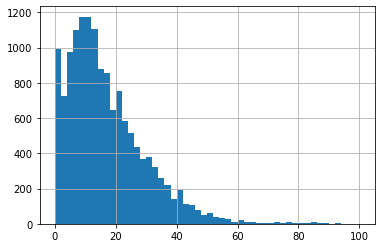

In [ ]:
df['PVinstallaties_per100houshoudens'].hist(bins = 50, range=(0, 100))

<AxesSubplot:>

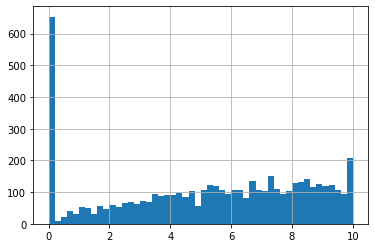

In [ ]:
df['PVinstallaties_per100houshoudens'].hist(bins = 50, range=(0, 10))

The records with 0 values require a deeper look to check for the presence of "false" 0's among them. But first, we shall check if the data for subsequent years are complete per buurt, i.e. no missing values there.

In [ ]:
df_pivot = df.pivot_table(index='BU_2021', 
                        columns='Year', 
                        values='PVinstallaties_per100houshoudens')

In [ ]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2096 entries, BU00140000 to BU19030509
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2016    2096 non-null   float64
 1   2017    2096 non-null   float64
 2   2018    2096 non-null   float64
 3   2019    2096 non-null   float64
 4   2020    1959 non-null   float64
 5   2021    2036 non-null   float64
 6   2022    2077 non-null   float64
dtypes: float64(7)
memory usage: 131.0+ KB


In [ ]:
df_pivot

Year,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
BU_2021,,,,,,,
BU00140000,0.903955,1.186441,0.000000,1.779661,2.175141,3.022599,3.361582
BU00140001,0.440191,0.688995,0.899522,1.110048,1.358852,1.913876,2.430622
BU00140002,0.865385,0.000000,1.250000,1.570513,1.762821,2.660256,3.333333
BU00140003,0.782918,0.782918,1.067616,0.000000,1.209964,1.423488,1.708185
BU00140100,4.688995,5.263158,5.933014,8.229665,8.229665,9.952153,11.961722
...,...,...,...,...,...,...,...
BU19030500,9.113924,11.139241,0.000000,20.000000,21.518987,26.582278,30.886076
BU19030501,8.148148,11.358025,13.580247,16.543210,17.777778,22.469136,28.395062
BU19030502,8.235294,10.588235,11.764706,15.294118,15.000000,17.647059,24.117647


It is visible that there are some nan's, but also some 0's in between positive values as well!

In [ ]:
df_pivot.isna().sum()

Year
2016      0
2017      0
2018      0
2019      0
2020    137
2021     60
2022     19
dtype: int64

In [ ]:
df_nans = df_pivot[df_pivot.isnull().any(axis=1)]
df_nans

Year,2016,2017,2018,2019,2020,2021,2022
BU_2021,,,,,,,
BU00140705,0.0,0.0,0.0,0.0,NaN,76.0,48.0
BU00140805,16.0,12.0,24.0,24.0,60.0,76.0,NaN
BU00140809,0.0,5.0,5.0,5.0,NaN,NaN,15.0
BU00140905,12.5,12.5,15.0,17.5,NaN,30.0,NaN
BU00141106,0.0,16.0,16.0,0.0,NaN,88.0,56.0
...,...,...,...,...,...,...,...
BU19030205,10.0,10.0,10.0,10.0,NaN,NaN,22.0
BU19030403,17.5,17.5,17.5,20.0,NaN,NaN,32.5
BU19030409,16.0,18.0,22.0,28.0,NaN,82.0,52.0


In [ ]:
df_nans.shape[0]

151

It is strange that for some buurten the value for 2022 is smaller than for 2021 (actually it seems to be the rule for this selection of records!). 

In [ ]:
df_nans[df_nans['2022-01-01'] < df_nans['2021-01-01']]

Year,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
BU_2021,,,,,,,
BU00140705,0.000000,0.000000,0.000000,0.000000,NaN,76.000000,48.000000
BU00141106,0.000000,16.000000,16.000000,0.000000,NaN,88.000000,56.000000
BU01093037,10.000000,10.000000,10.000000,14.000000,NaN,62.000000,30.000000
BU01140806,0.000000,6.000000,10.000000,12.000000,NaN,26.000000,24.000000
BU01141001,10.666667,10.666667,10.666667,10.666667,NaN,28.000000,26.666667
BU01530904,2.068966,2.758621,5.517241,7.586207,NaN,28.275862,13.103448
BU01580690,7.272727,7.272727,9.090909,0.000000,NaN,29.090909,25.454545
BU01630603,2.222222,2.222222,2.222222,5.185185,NaN,17.037037,8.148148
BU07581009,0.000000,16.000000,16.000000,18.000000,NaN,76.000000,34.000000


In [ ]:
df_nans[df_nans['2022-01-01'] < df_nans['2021-01-01']].shape[0]

29

In [ ]:
df_pivot[df_pivot['2022-01-01'] < df_pivot['2021-01-01']].shape[0]

248

It seems there are more examples where value for 2022 is lower than 2021. A hypothesis can be that 2022 data are incomplete. Would it be better to remove 2022 altogether?

In [ ]:
df_pivot[df_pivot['2021-01-01'] < df_pivot['2020-01-01']].shape[0]

104

In [ ]:
df_pivot[df_pivot['2020-01-01'] < df_pivot['2019-01-01']].shape[0]

808

In [ ]:
df_pivot[df_pivot['2020-01-01'] < df_pivot['2019-01-01']].shape[0] / df_pivot.shape[0]

0.38549618320610685

The number is shockingly high! It is almost 40% of all the records. Let's view these records.

In [ ]:
df_pivot[df_pivot['2020-01-01'] < df_pivot['2019-01-01']].head()

Year,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
BU_2021,,,,,,,
BU00140103,0.326409,0.415430,0.593472,2.106825,1.839763,3.026706,3.590504
BU00140105,1.438849,1.726619,1.870504,3.741007,3.309353,6.906475,8.345324
BU00140107,1.136364,1.477273,1.931818,2.386364,2.159091,3.409091,4.886364
BU00140200,4.034582,4.841499,5.302594,6.570605,6.340058,7.377522,8.069164
BU00140201,3.383459,4.210526,5.112782,6.428571,6.315789,8.609023,10.112782


The differences are not large, and there is a certain regularity there. It happens between 2019 and 2020, which are exactly when datasets from two sources, CBS and Enexis, come together. It is an important observation. Apparently, Enexis set seems to contain lower values. The two datasets are not fully compatible. It has to be decided what to do with it. 

In [ ]:
df_pivot[df_pivot['2019-01-01'] < df_pivot['2018-01-01']].shape[0]

55

In [ ]:
df_pivot[df_pivot['2018-01-01'] < df_pivot['2017-01-01']].shape[0]

95

In [ ]:
df_pivot[df_pivot['2017-01-01'] < df_pivot['2016-01-01']].shape[0]

42

OK, let's get rid of false 0's first. 

In [ ]:
df_pivot[(df_pivot['2016-01-01'] > 0) & (df_pivot['2017-01-01'] == 0) & (df_pivot['2018-01-01'] == 0)]

Year,2016-01-01,2017-01-01,2018-01-01,2019-01-01,2020-01-01,2021-01-01,2022-01-01
BU_2021,,,,,,,
BU01640002,3.047619,0.0,0.0,6.095238,NaN,8.000000,13.523810
BU01660500,12.923077,0.0,0.0,0.000000,24.923077,29.846154,38.153846
BU01680001,11.089431,0.0,0.0,20.715447,20.845528,27.544715,37.105691
BU09350300,2.954545,0.0,0.0,8.409091,8.295455,9.204545,11.363636
BU09860201,6.796117,0.0,0.0,24.142395,24.401294,29.061489,33.915858
BU09882501,9.624060,0.0,0.0,0.000000,20.601504,23.458647,30.375940
BU16590100,5.968109,0.0,0.0,15.170843,14.350797,21.002278,31.845103
BU17060200,11.404959,0.0,0.0,0.000000,16.198347,21.818182,35.867769


In [ ]:
#df = df.drop(index = df[df['Aantal aansluitingen met opwekinstallatie'] > df['HuishoudensTotaal_28']].index)

In [ ]:
df.to_csv(path_or_buf = c_path + 'PV installed capacity & demographics.csv', encoding='utf-8', index = False)

In [ ]:
#df.to_excel(c_path + "PV installed capacity & demographics.xlsx")